**CODEALPHA TASK 1: IRIS FLOWER CLASSIFICATION**

**Student ID: CA/DF1/22584**

**Name: Sunit Modak**

In [ ]:
# Importing All Essential Librarys For This Project

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# --- Load data (if you've downloaded iris.csv) ---
df = pd.read_csv("Iris.csv")

In [ ]:
# Inspect the first few rows
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Separate features and target
X = df.drop("Species", axis=1)
y = df["Species"]

In [ ]:
# Convert species names to numeric labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [ ]:
# Build simple classifier (kNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predict on test set
y_pred = knn.predict(X_test)

In [ ]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



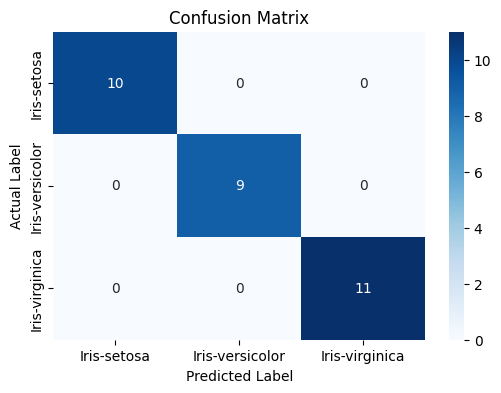

In [ ]:
# 1. Import the missing libraries for graphing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 2. Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
# --- RE-RUNNING ESSENTIALS & INTERACTIVE PREDICTION ---
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# 1. Reload Data & Re-train Model (Hidden in background)
iris = load_iris()
X, y = iris.data, iris.target
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

print("\n--- 🌸 Iris Flower Prediction System 🌸 ---")
print("Please enter the measurements in centimeters:")

# 2. Take User Input
try:
    sl = float(input("Enter Sepal Length: "))
    sw = float(input("Enter Sepal Width:  "))
    pl = float(input("Enter Petal Length: "))
    pw = float(input("Enter Petal Width:  "))

    # 3. Predict
    features = np.array([[sl, sw, pl, pw]])
    prediction_index = knn.predict(features)
    prediction_name = iris.target_names[prediction_index][0]

    print(f"\n✅ Prediction: This flower is a {prediction_name}!")

except ValueError:
    print("\n❌ Error: Please enter valid numbers.")
except NameError:
    print("\n❌ Error: The model is not trained. Please run all cells above first.")


--- 🌸 Iris Flower Prediction System 🌸 ---
Please enter the measurements in centimeters:
Enter Sepal Length: 5.1
Enter Sepal Width:  3.5
Enter Petal Length: 1.4
Enter Petal Width:  0.2

✅ Prediction: This flower is a setosa!
